In [18]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt
from sklearn import datasets
import pandas as pd

Ridge regression i.e., least squares loss with L2 penalty.

In [19]:
def Ridge_Solve(X,y,lam):
    p = X.shape[1]
    mu = cp.Variable(1)
    beta = cp.Variable((p,1))
    objective = cp.Minimize(cp.sum_squares(y-X@beta-mu)+lam*cp.sum_squares(beta))
    constraints = []
    prob = cp.Problem(objective,constraints)
    prob.solve()
    return beta.value,mu.value
    

Lasso regression, i.e., least squares loss with L1 penalty.

In [20]:
def Lasso_Solve(X,y,lam):
    p = X.shape[1]
    mu = cp.Variable(1)
    beta = cp.Variable((p,1))
    objective = cp.Minimize(cp.sum_squares(y-X@beta-mu)+lam*cp.norm1(beta))
    constraints = []
    prob = cp.Problem(objective,constraints)
    prob.solve()
    return beta.value,mu.value

Robust hybrid, i.e., Huber loss with berhu penalty.

In [21]:
M=1.35
def Robust_Hybrid_Solve(X,y,lam):
    n = y.shape[0]
    p = X.shape[1]
    sig = cp.Variable(1)
    tau = cp.Variable(1)
    mu = cp.Variable(1)
    res = cp.Variable((n,1))
    beta = cp.Variable((p,1))
    u1 = cp.Variable((n,1))
    v1 = cp.Variable((n,1))
    res = y-X@beta-mu
    u2 = cp.Variable((p,1))
    v2 = cp.Variable((p,1))
    objective = cp.Minimize(cp.quad_over_lin(u1,sig)+2*M*cp.sum(v1)+n*sig+lam*(cp.quad_over_lin(u2,2*M*tau)+cp.sum(u2)+cp.sum(v2)+p*tau))
    constraints = []
    constraints.append(cp.abs(res)<=u1+v1)
    constraints.append(u1<=M*sig)
    constraints.append(v1>=0)
    constraints.append(sig>=0)
    constraints.append(cp.abs(beta)<=u2+v2)
    constraints.append(v2<=M*tau)
    constraints.append(u2>=0)
    constraints.append(tau>=0)

    prob = cp.Problem(objective,constraints)
    prob.solve()

    return beta.value,mu.value

In [22]:
diabetes = datasets.load_diabetes()
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [23]:
X = diabetes.data
y = diabetes.target
print(X[0])

[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]


In [24]:
X = np.array(X)
Y = np.array(y)
y = Y.reshape((442,1))
beta,mu = Ridge_Solve(X,y,0.95)
print(beta)

[[  28.89491315]
 [ -86.67813909]
 [ 312.45656147]
 [ 205.12565333]
 [   4.49499642]
 [ -31.739717  ]
 [-154.04746786]
 [ 117.93458205]
 [ 267.97559752]
 [ 112.24900256]]


In [25]:
b1 = np.array([0.00005,0.15,0.25,0.4,0.5,0.6,0.65,0.7,0.75,0.8,0.9,0.96,1])
lam = 1/b1

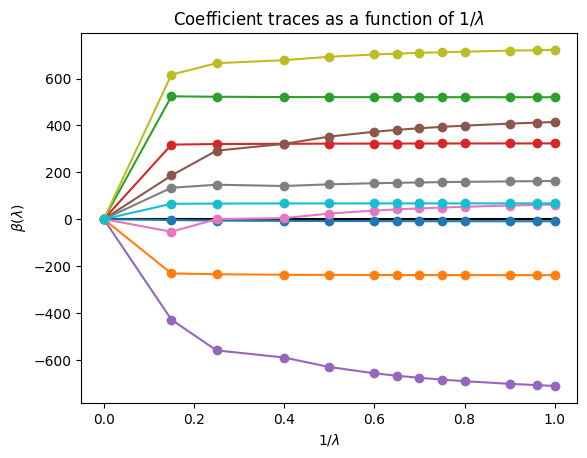

In [26]:
beta = []
for l in lam:
    b,mu = Lasso_Solve(X,y,l)
    beta.append(b)
z = np.ones_like(b1)
plt.plot(b1,z,'black')
beta = np.array(beta)
plt.title('Coefficient traces as a function of 1/$\lambda$')
plt.ylabel(r'$\beta(\lambda)$')
plt.xlabel('$1/\lambda$')
for i in range(10):
    plt.plot(b1,beta[:,i],'-o')

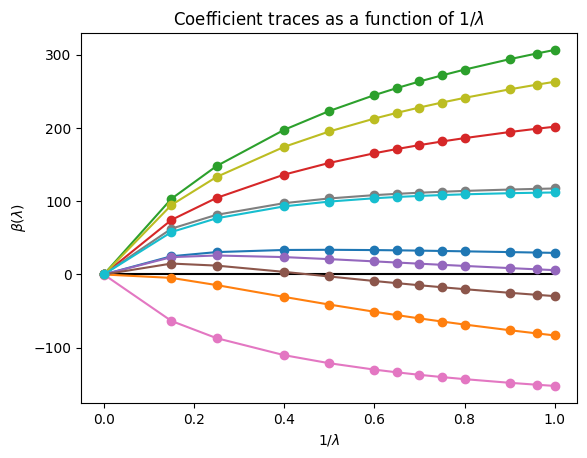

In [27]:
beta = []
for l in lam:
    b,mu = Ridge_Solve(X,y,l)
    beta.append(b)
beta = np.array(beta)
z = np.ones((13,))
plt.plot(b1,z,'black')
plt.title('Coefficient traces as a function of 1/$\lambda$')
plt.ylabel(r'$\beta(\lambda)$')
plt.xlabel('$1/\lambda$')
for i in range(10):
    plt.plot(b1,beta[:,i],'-o')

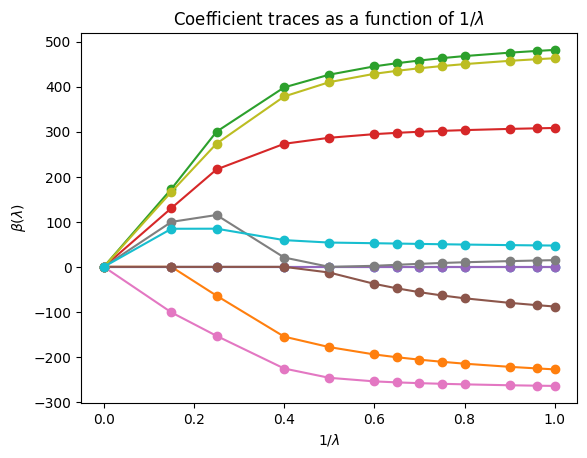

In [28]:
beta = []
for l in lam:
    b,mu = Robust_Hybrid_Solve(X,y,l)
    beta.append(b)
beta = np.array(beta)
plt.title('Coefficient traces as a function of 1/$\lambda$')
plt.ylabel(r'$\beta(\lambda)$')
plt.xlabel('$1/\lambda$')
for i in range(10):
    plt.plot(b1,beta[:,i],'-o')